# Kümeleme işlemi uygulanmış veri üzerinde eğitim ve ilgili metriklerin sunumu

In [16]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 7096-3171

 Directory of c:\Users\bugra\Desktop\fut_scout_data\fut_scout_data_operations\understat_classification

14.05.2022  19:41    <DIR>          .
14.05.2022  19:41    <DIR>          ..
14.05.2022  18:48               673 clustering.py
14.05.2022  19:38            27.695 clustering_plot.ipynb
14.05.2022  19:02             1.032 clustering_plot.py
14.05.2022  18:33    <DIR>          data
14.05.2022  18:33             1.615 data_append.py
14.05.2022  19:41    <DIR>          figures
14.05.2022  18:33             2.477 full_data.py
14.05.2022  18:33    <DIR>          model
14.05.2022  19:22             4.295 train.py
14.05.2022  19:41            26.287 training_with_custom_parameters.ipynb
14.05.2022  19:41                 0 training_with_hyper_parameter_tuning.ipynb
14.05.2022  18:33    <DIR>          understat_classification
               8 File(s)         64.074 bytes
               6 Dir(s)  287.937.683.456 bytes free


## Kütüphanelerin eklenmesi

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import metrics

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras import callbacks
import tensorflow as tf
import keras

## Kullanacağımız Yapay Sinir Ağı Modelinin Tanımlanması

In [36]:
def createModel(n_cols):

    model = keras.Sequential([

        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=8, activation='relu'),
        keras.layers.Dense(units=n_cols, activation='softmax'),
    ]
    )

    optim = Adam(lr=0.001)
    model.compile(optimizer=optim, loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

## KNN Eğitim Fonksiyonunun oluşturulması

In [19]:
def knn(X_train, y_train, X_test, y_test):
        plt.clf()
        dt = KNeighborsClassifier()
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(
                y_test.argmax(axis=1), y_pred.argmax(axis=1))
        p = sns.heatmap(pd.DataFrame(cnf_matrix),
                        annot=True, cmap="YlGnBu", fmt='g')
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

        plt.savefig('knn_default_parameters_cm.png')
        plt.clf()

## Decision Tree Eğitim Fonksiyonunun oluşturulması

In [20]:
def decision_tree(X_train, y_train, X_test, y_test):
        plt.clf()
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(
                y_test.argmax(axis=1), y_pred.argmax(axis=1))
        p = sns.heatmap(pd.DataFrame(cnf_matrix),
                        annot=True, cmap="YlGnBu", fmt='g')
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

        plt.savefig('decision_tree_default_parameters_cm.png')
        plt.clf()

## ANN Eğitim Fonksiyonunun oluşturulması

In [21]:
def ann_model(X_train, y_train, X_test, y_test):
        early_stopping = callbacks.EarlyStopping(
        min_delta=0.00001,
        patience=12,
        restore_best_weights=True)
        model = createModel(n_cols=n_cols)

        history = model.fit(X_train, y_train, batch_size=128, epochs=1000, callbacks=[
                        early_stopping], validation_split=0.2)
        model.save('model/model_sc_pca.h5')
        plt.subplot(211)
        plt.title('Loss')
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        
        plt.subplot(212)
        plt.title('Accuracy')
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.legend()
        plt.savefig('ann_default_parameters_acc_loss.png')
        plt.clf()
        y_pred = model.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(
                y_test.argmax(axis=1), y_pred.argmax(axis=1))
        sns.heatmap(pd.DataFrame(cnf_matrix),
                        annot=True, cmap="YlGnBu", fmt='g')
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

        plt.savefig('ann_default_parameters_cm.png')
        plt.clf()

In [22]:
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.36, random_state=14)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
knn(X_train, y_train, X_test, y_test)
decision_tree(X_train, y_train, X_test, y_test)
ann_model(X_train, y_train, X_test, y_test)

Epoch 1/1000


c:\Users\bugra\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 17ms/step - loss: 1.9017 - accuracy: 0.2743 - val_loss: 1.4163 - val_accuracy: 0.4106
Epoch 2/1000
30/30 [==============================] - 0s 11ms/step - loss: 1.4292 - accuracy: 0.4215 - val_loss: 1.1266 - val_accuracy: 0.5820
Epoch 3/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.1811 - accuracy: 0.5293 - val_loss: 0.8825 - val_accuracy: 0.6656
Epoch 4/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.9835 - accuracy: 0.6209 - val_loss: 0.7418 - val_accuracy: 0.7217
Epoch 5/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.8751 - accuracy: 0.6675 - val_loss: 0.6189 - val_accuracy: 0.7799
Epoch 6/1000
30/30 [==============================] - 0s 11ms/step - loss: 0.7697 - accuracy: 0.7133 - val_loss: 0.5162 - val_accuracy: 0.8148
Epoch 7/1000
30/30 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.7424 - val_loss: 0.4314 - val_accuracy: 0.8212
Epoch 8/1000


<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def create_roc_curve(y_test_encoded, y_pred_encoded, name, fold_number):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(y_test_encoded[0])):
        fpr[i], tpr[i], _ = roc_curve(
            y_test_encoded[:, i], y_pred_encoded[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(
        y_test_encoded.ravel(), y_pred_encoded.ravel())

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate(
        [fpr[i] for i in range(len(y_test_encoded[0]))]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(len(y_test_encoded[0])):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= len(y_test_encoded[0])
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.figure(figsize=(12, 12))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
             ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], fpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
             ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(sns.color_palette())
    for i, color in zip(range(len(y_test_encoded[0])), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig('roc_curve_'+name+'_'+str(fold_number) + '.png')
    plt.cla()
    plt.clf()


## KNN K-Fold

<Figure size 432x288 with 0 Axes>

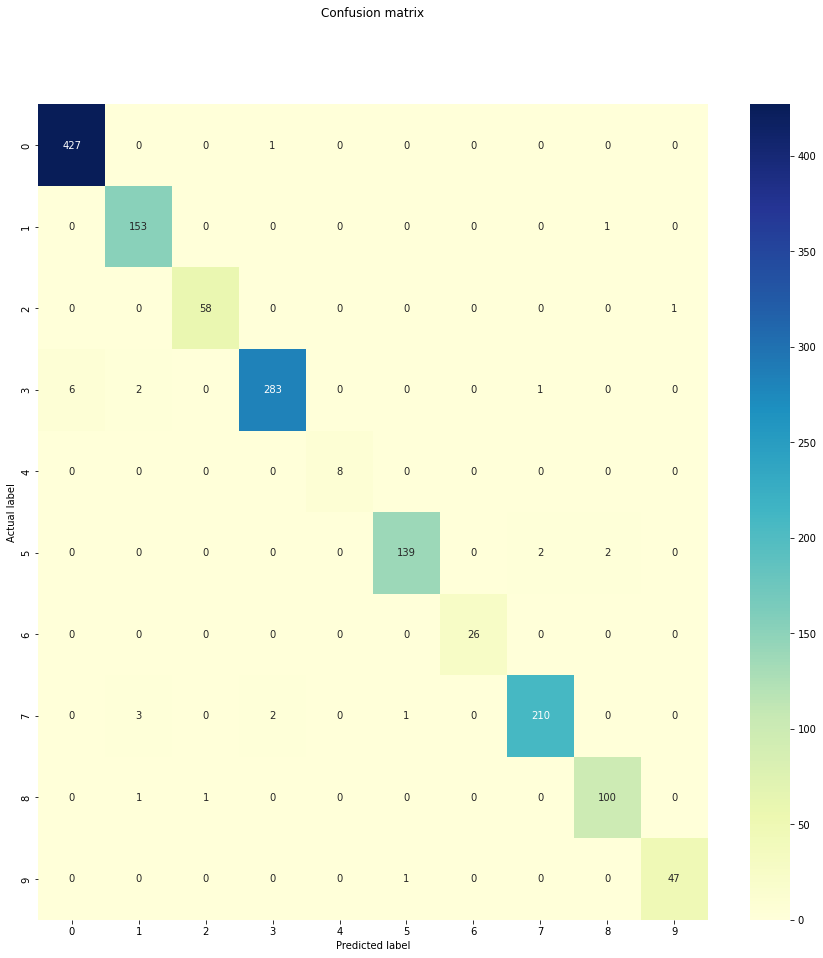

<Figure size 864x864 with 0 Axes>

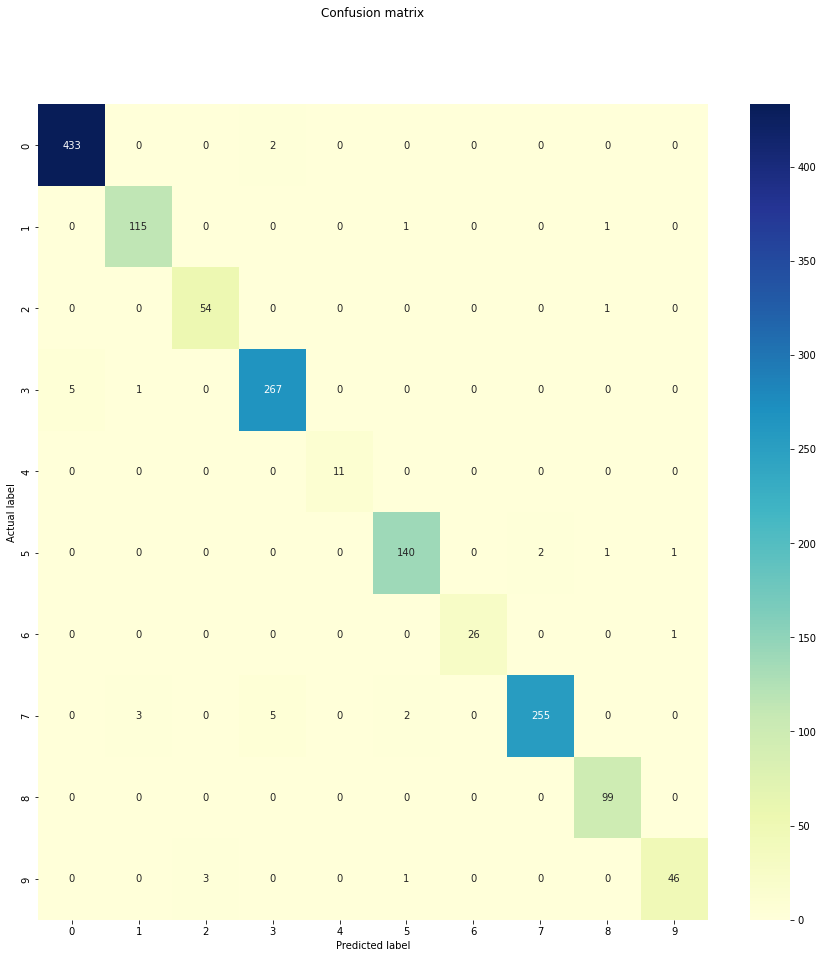

<Figure size 864x864 with 0 Axes>

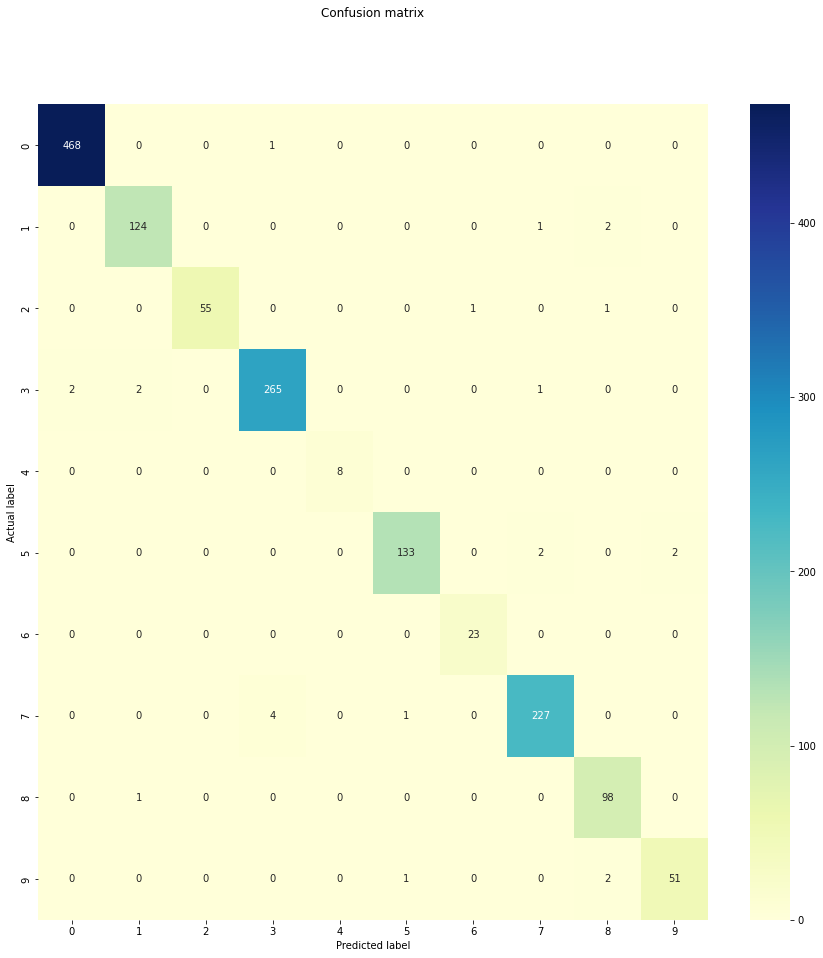

<Figure size 864x864 with 0 Axes>

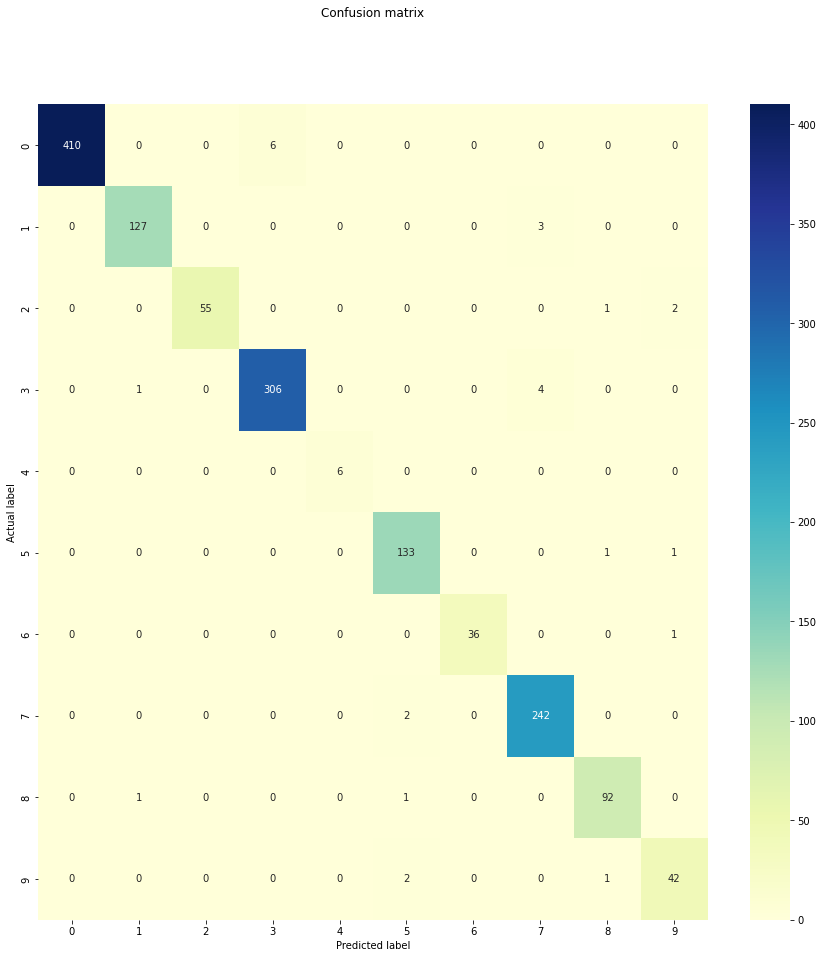

<Figure size 864x864 with 0 Axes>

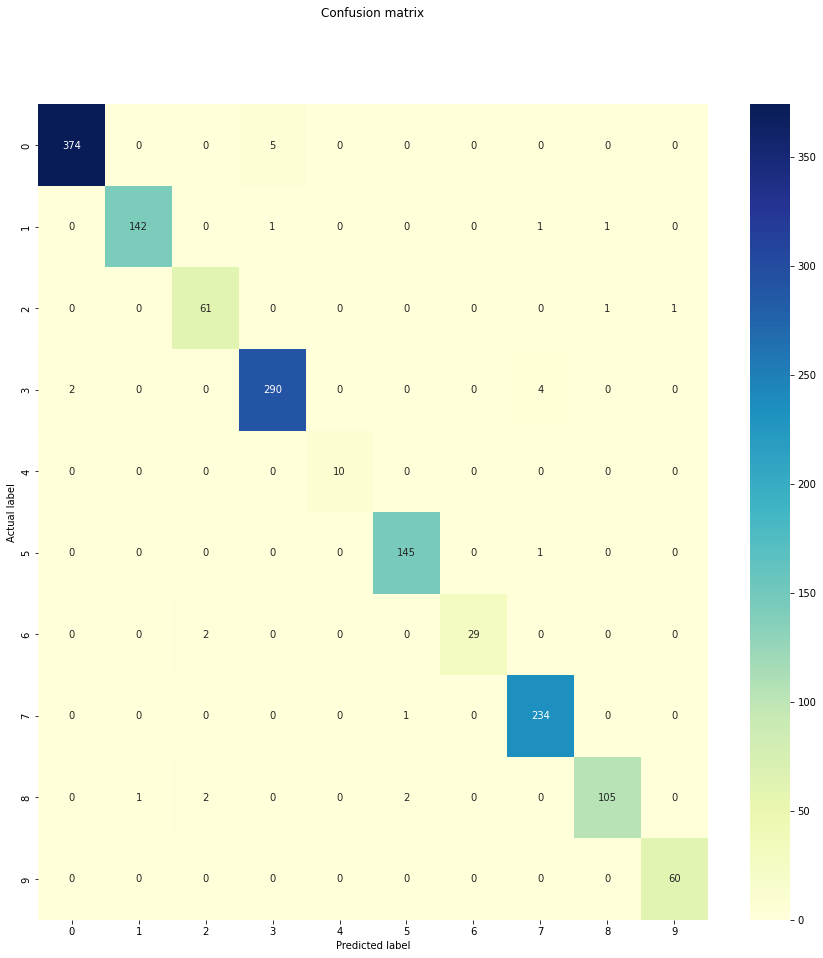

<Figure size 864x864 with 0 Axes>

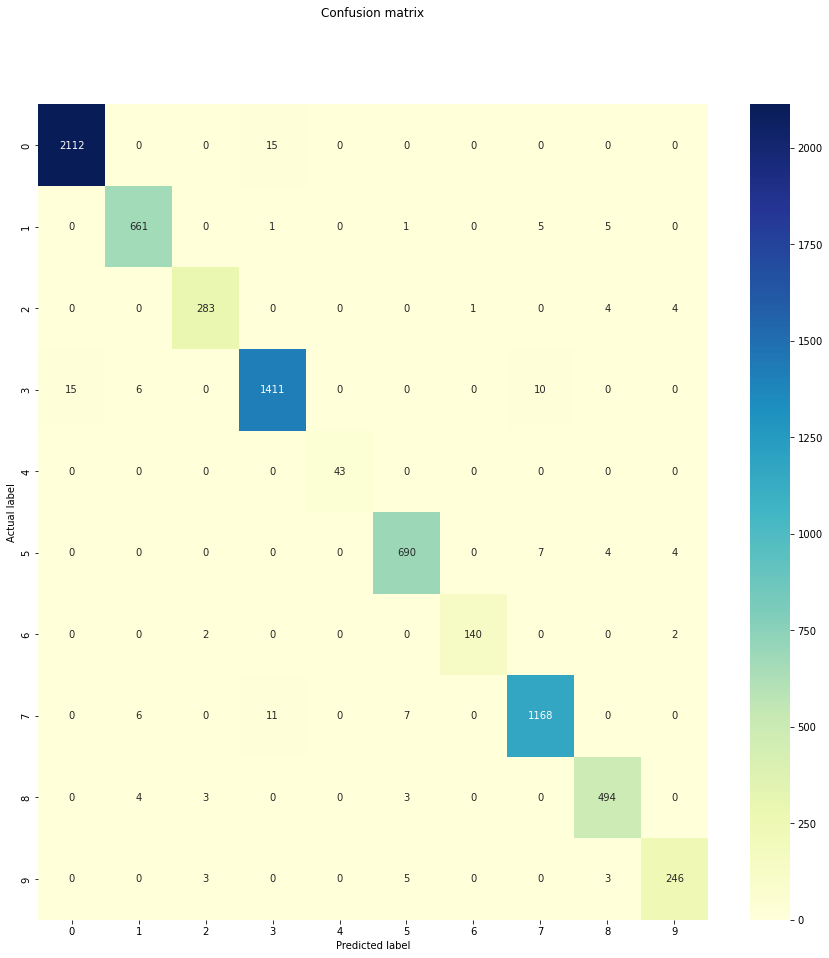

In [44]:
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

knn = KNeighborsClassifier(n_neighbors=3)
cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
                y_test.argmax(axis=1), y_pred.argmax(axis=1))
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15,15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                            annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.savefig('figures_results\knn\knn_conf_matrix_'+str(fold_number)+'_fold.png')
    create_roc_curve(y_test, y_pred, 'knn', fold_number)
    clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
    clsf_report.to_csv('knn_fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1

plt.clf()
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(sum(cfs)),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\knn\knn_overlapped_matrix_5_fold.png')

## Decision Tree K-Fold

<Figure size 432x288 with 0 Axes>

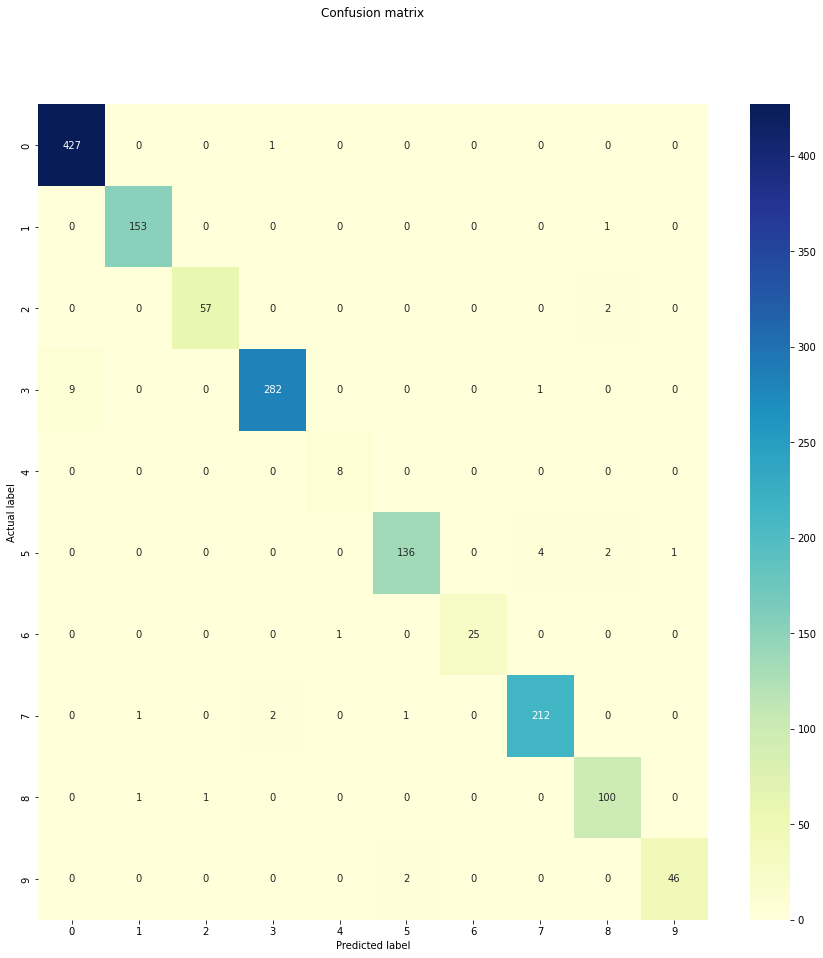

<Figure size 864x864 with 0 Axes>

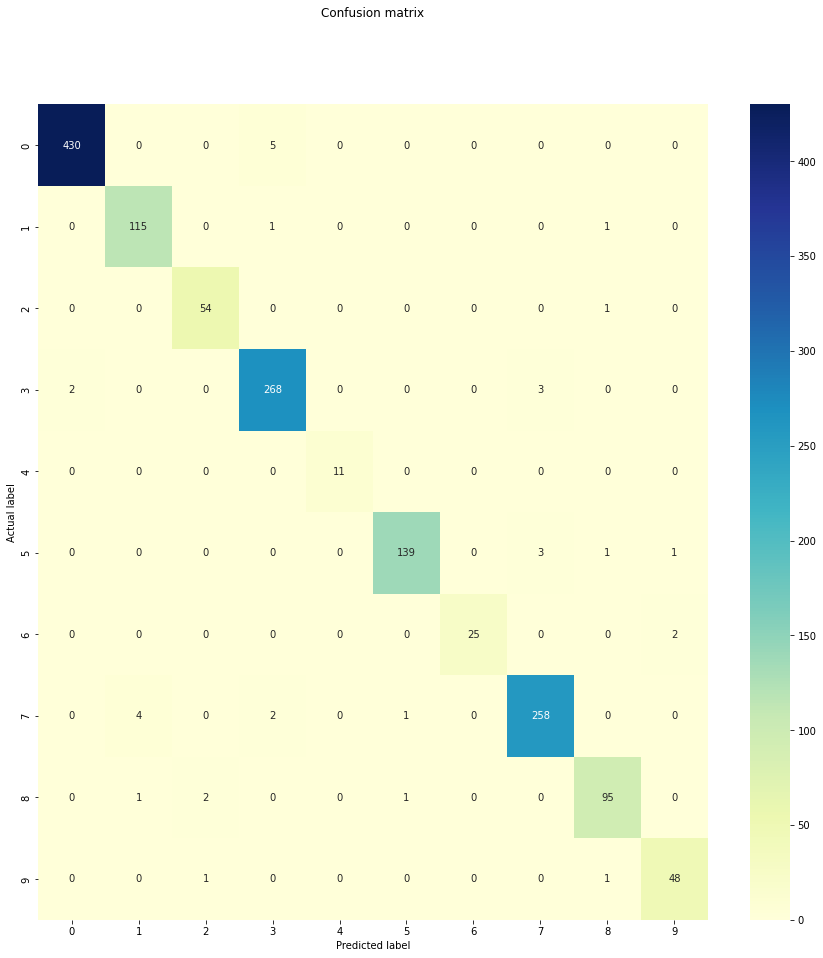

<Figure size 864x864 with 0 Axes>

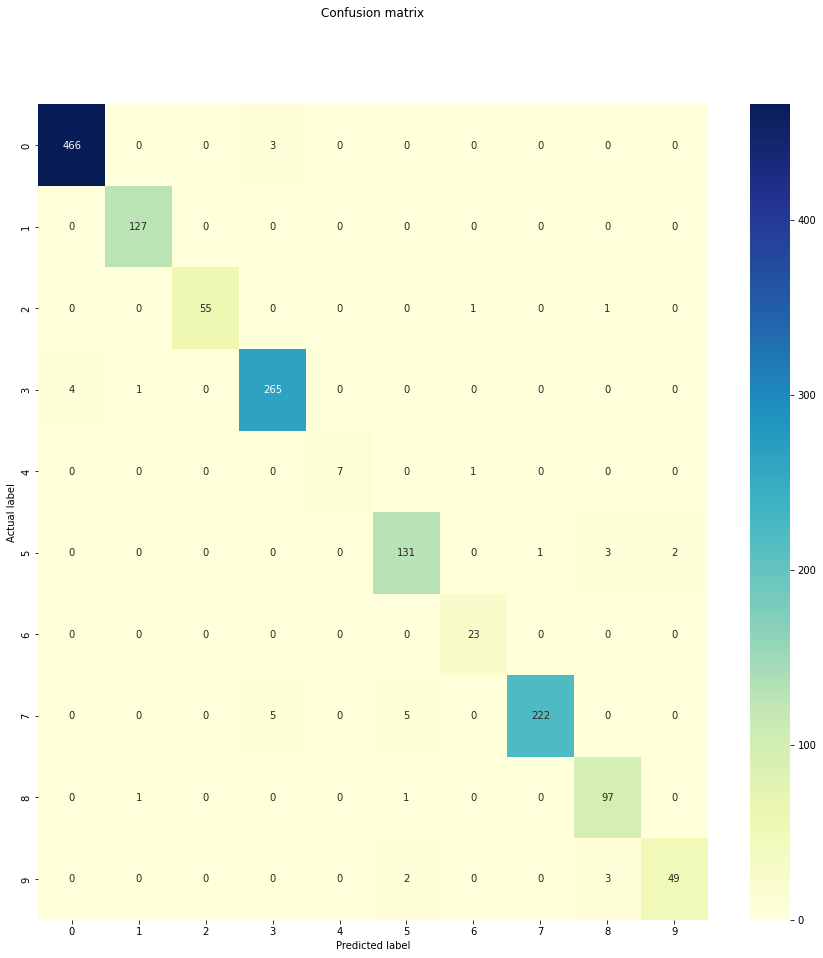

<Figure size 864x864 with 0 Axes>

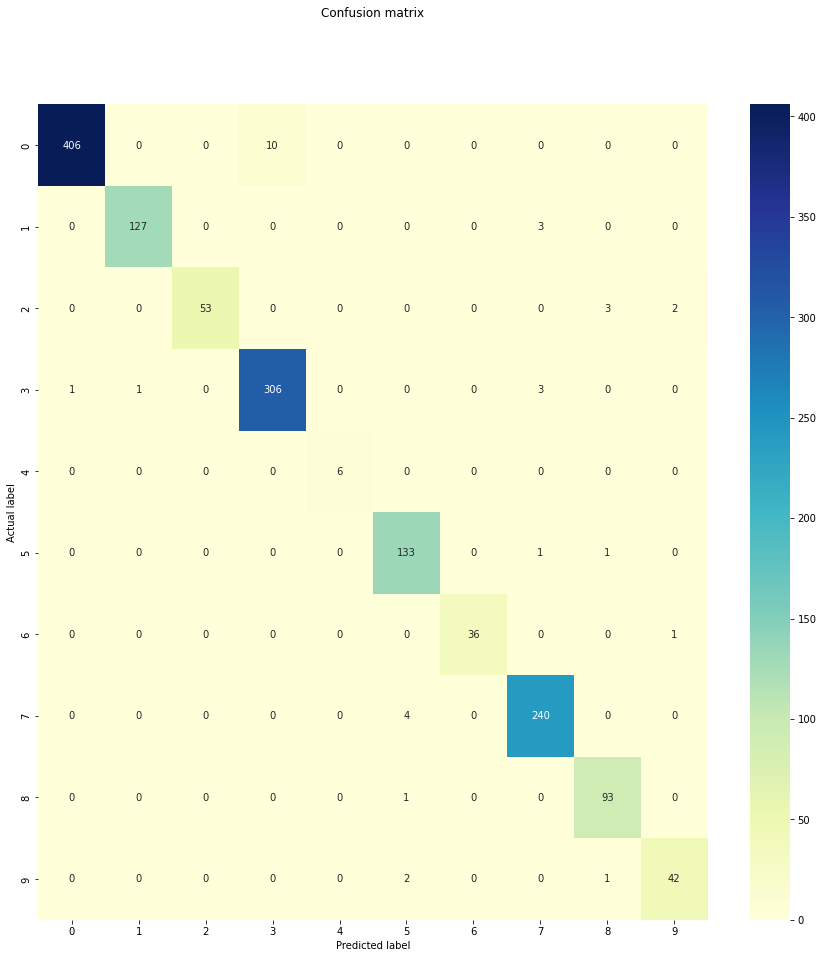

<Figure size 864x864 with 0 Axes>

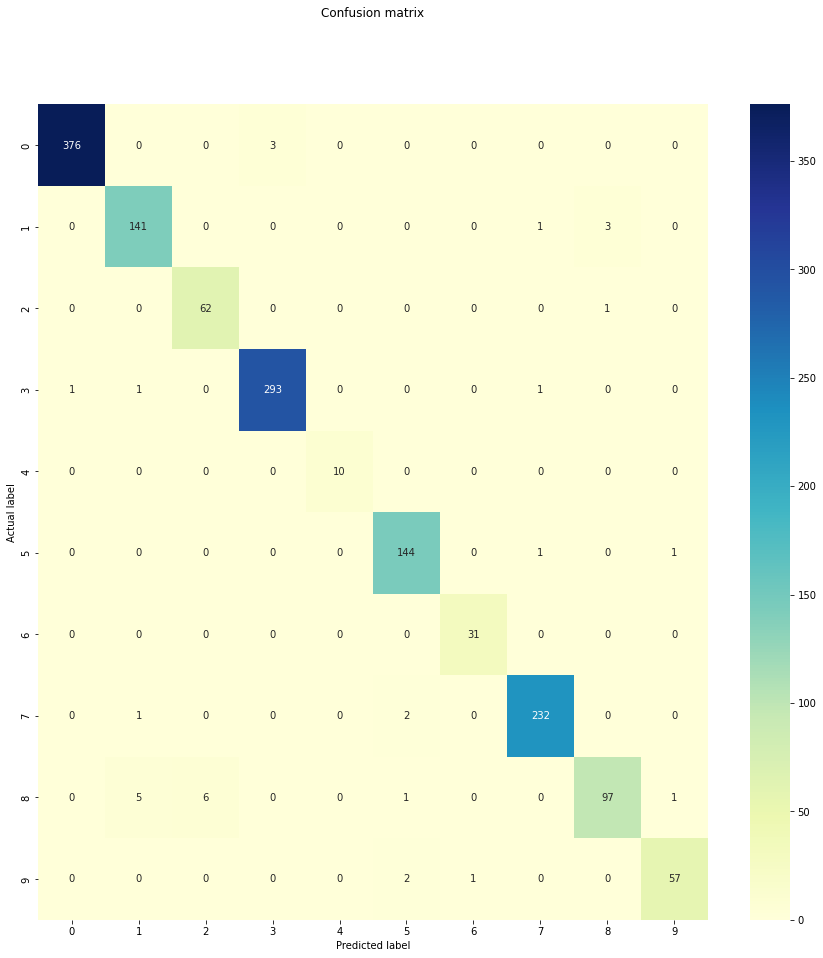

<Figure size 864x864 with 0 Axes>

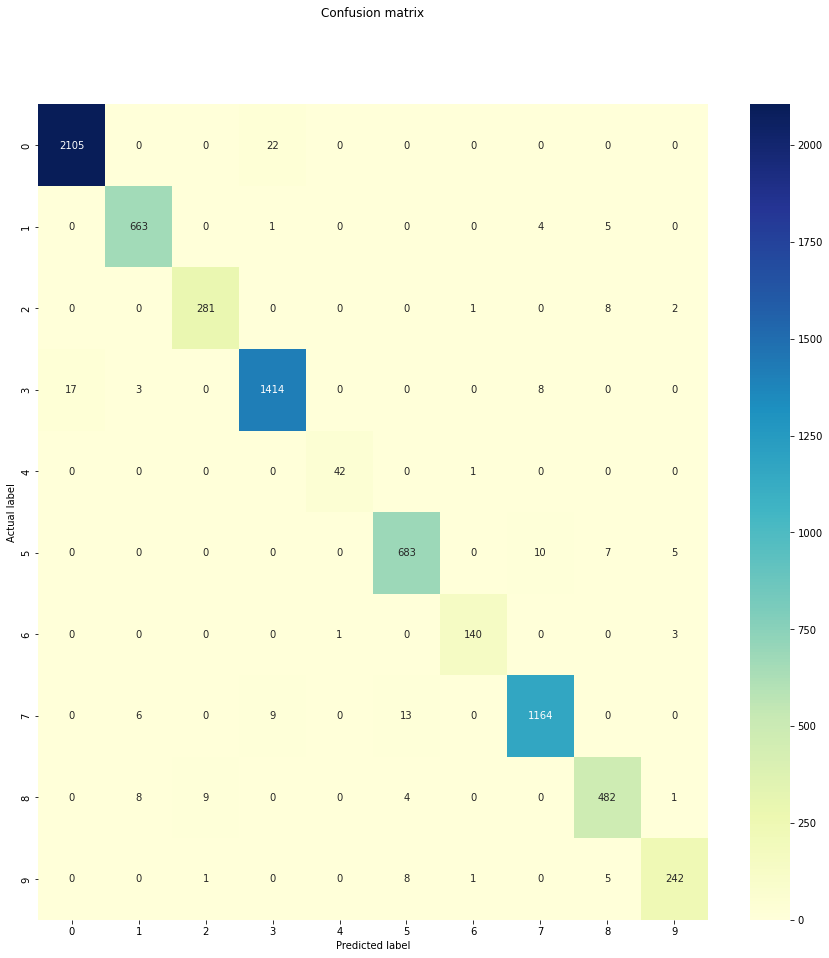

In [43]:
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

dt = DecisionTreeClassifier(criterion='gini', max_depth=120)
cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
                y_test.argmax(axis=1), y_pred.argmax(axis=1))
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15,15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                            annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.savefig('figures_results\decision_tree\decision_tree_conf_matrix_'+str(fold_number)+'_fold.png')
    create_roc_curve(y_test, y_pred, 'decision_tree', fold_number)
    
    clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
    clsf_report.to_csv('ann_fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1

plt.clf()
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(sum(cfs)),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\decision_tree\decision_tree_overlapped_matrix_5_fold.png')

## ANN KFold

Epoch 1/1000


c:\Users\bugra\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


37/37 [==============================] - 1s 18ms/step - loss: 1.9873 - accuracy: 0.2946 - val_loss: 1.6795 - val_accuracy: 0.4352
Epoch 2/1000
37/37 [==============================] - 0s 10ms/step - loss: 1.5294 - accuracy: 0.4394 - val_loss: 1.3291 - val_accuracy: 0.5368
Epoch 3/1000
37/37 [==============================] - 0s 9ms/step - loss: 1.3247 - accuracy: 0.5161 - val_loss: 1.1456 - val_accuracy: 0.5868
Epoch 4/1000
37/37 [==============================] - 0s 9ms/step - loss: 1.1755 - accuracy: 0.5843 - val_loss: 1.0073 - val_accuracy: 0.6579
Epoch 5/1000
37/37 [==============================] - 0s 10ms/step - loss: 1.0455 - accuracy: 0.6247 - val_loss: 0.8797 - val_accuracy: 0.7019
Epoch 6/1000
37/37 [==============================] - 0s 10ms/step - loss: 0.9372 - accuracy: 0.6542 - val_loss: 0.7528 - val_accuracy: 0.7223
Epoch 7/1000
37/37 [==============================] - 0s 10ms/step - loss: 0.8471 - accuracy: 0.6620 - val_loss: 0.6646 - val_accuracy: 0.7257
Epoch 8/1000
3

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

<Figure size 1080x1080 with 0 Axes>

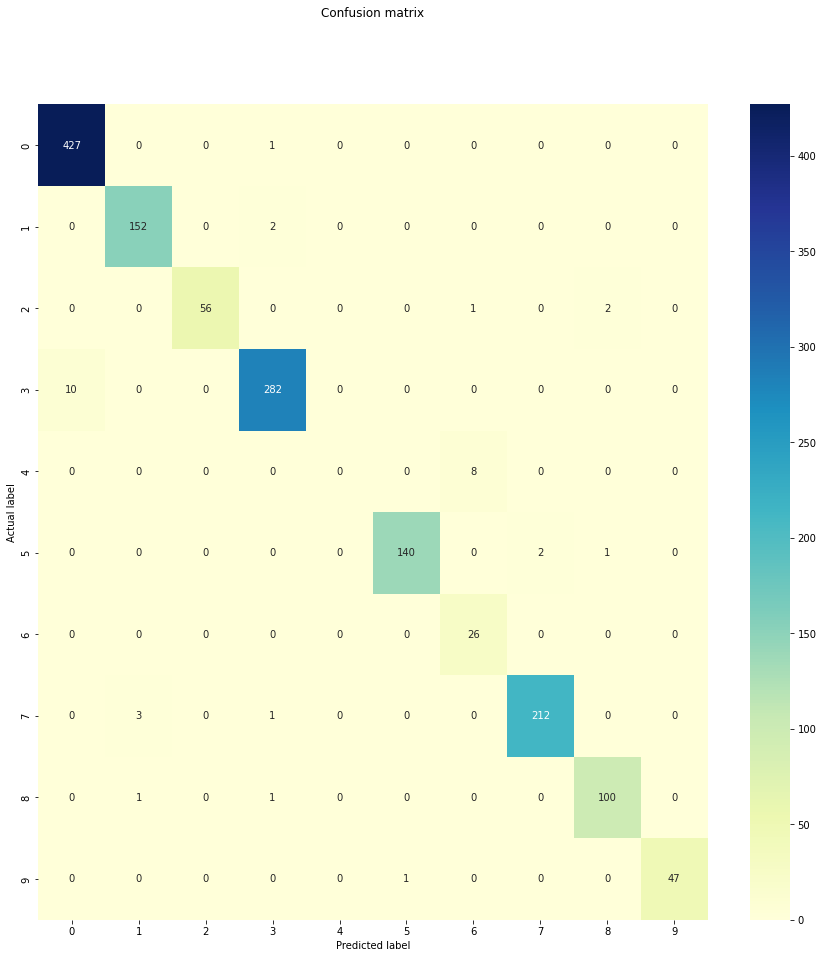

<Figure size 864x864 with 0 Axes>

In [41]:


df = pd.read_csv(
    'data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis=1).values
y = df['classes']
n_cols = len(np.unique(y))
early_stopping = callbacks.EarlyStopping(
    min_delta=0.00001,
    patience=12,
    restore_best_weights=True)
model = createModel(n_cols=n_cols)


cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    history = model.fit(X_train, y_train, batch_size=128, epochs=1000, callbacks=[
        early_stopping], validation_split=0.2)
    plt.figure(figsize=(15, 15))
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.savefig('figures_results/ann/kfold/ann_default_parameters_acc_loss_'+str(fold_number)+'.png')
    plt.clf()
    y_pred = model.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
        y_test.argmax(axis=1), y_pred.argmax(axis=1))
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15, 15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.savefig('figures_results\\ann\\ann_conf_matrix_' +
                str(fold_number)+'_fold.png')
    create_roc_curve(y_test, y_pred, 'ann', fold_number)

    clsf_report = pd.DataFrame(classification_report(y_true = y_test_cat, y_pred = y_pred_cat, output_dict=True)).transpose()
    clsf_report.to_csv('ann_fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1
model.save('model\\ann_model_5_fold.h5')
plt.clf()
plt.figure(figsize=(15, 15))
sns.heatmap(pd.DataFrame(sum(cfs)),
            annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\\ann\\ann_overlapped_matrix_5_fold.png')


## SVC

<Figure size 432x288 with 0 Axes>

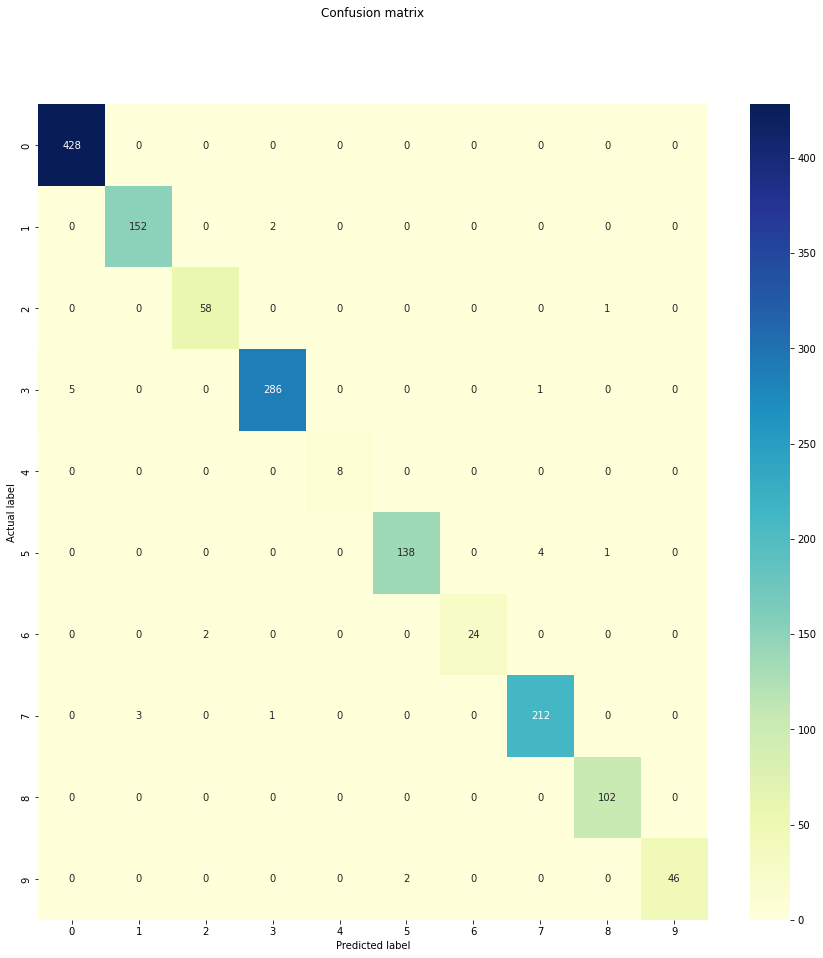

<Figure size 864x864 with 0 Axes>

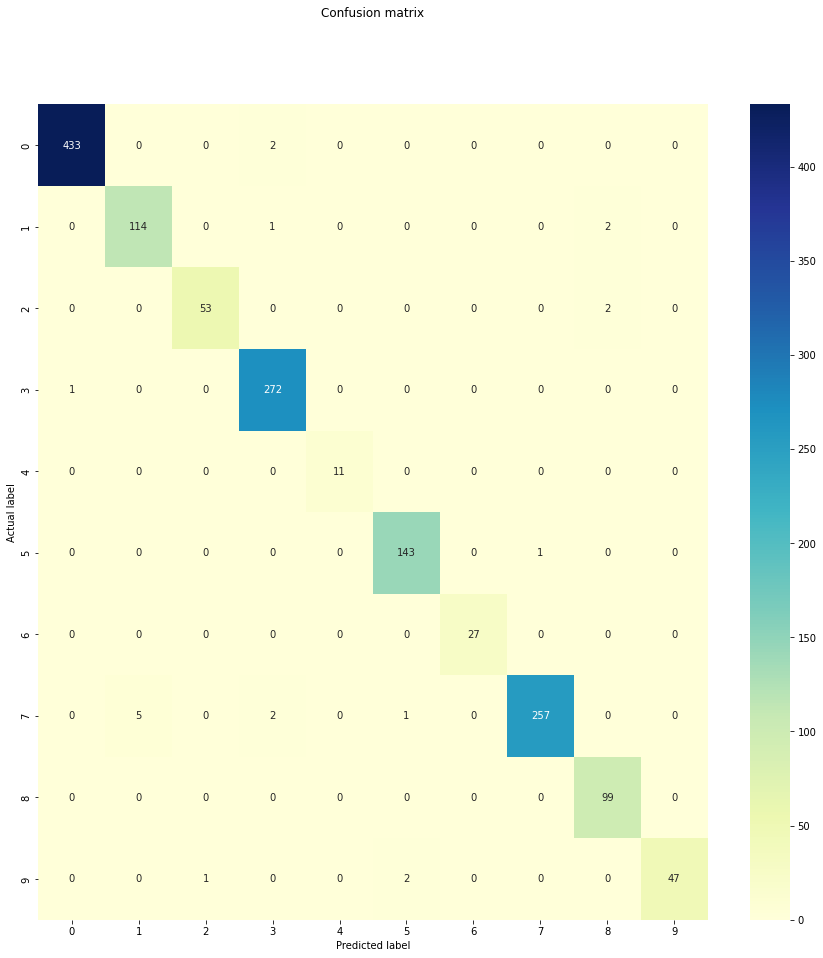

<Figure size 864x864 with 0 Axes>

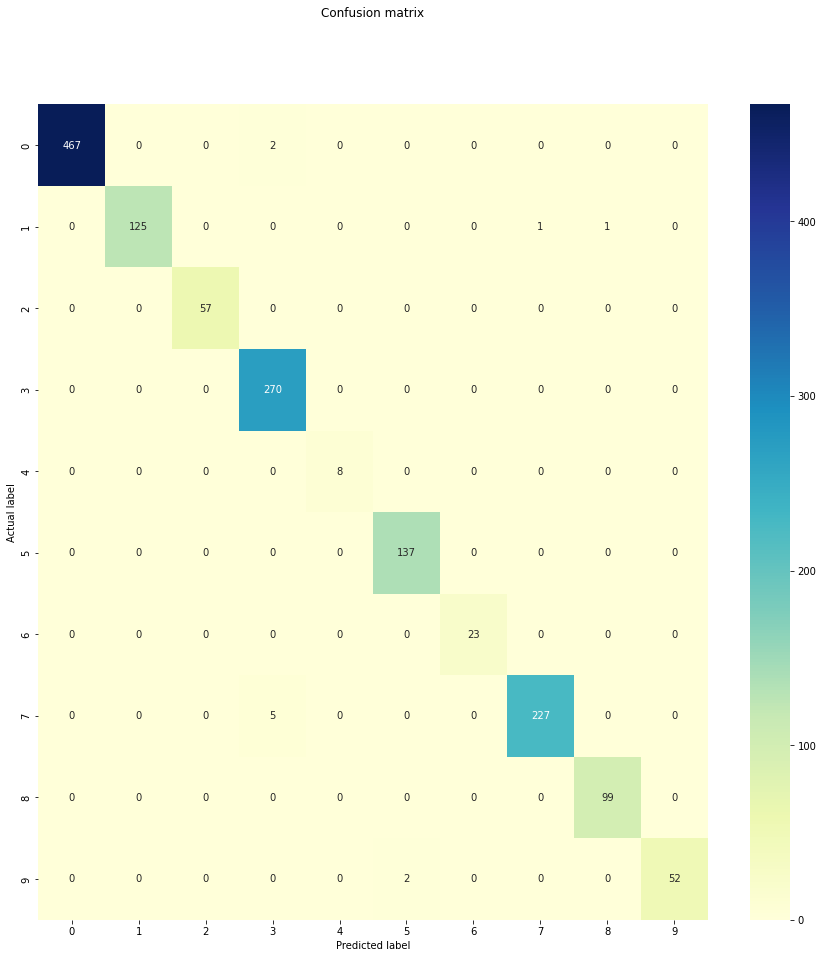

<Figure size 864x864 with 0 Axes>

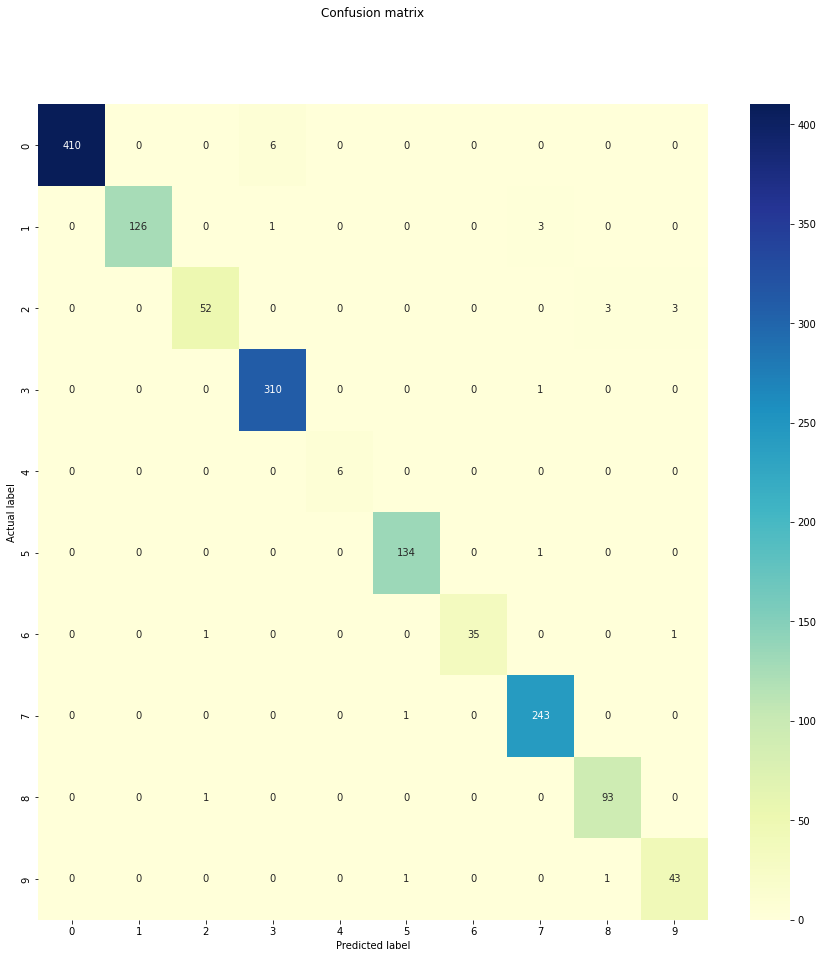

<Figure size 864x864 with 0 Axes>

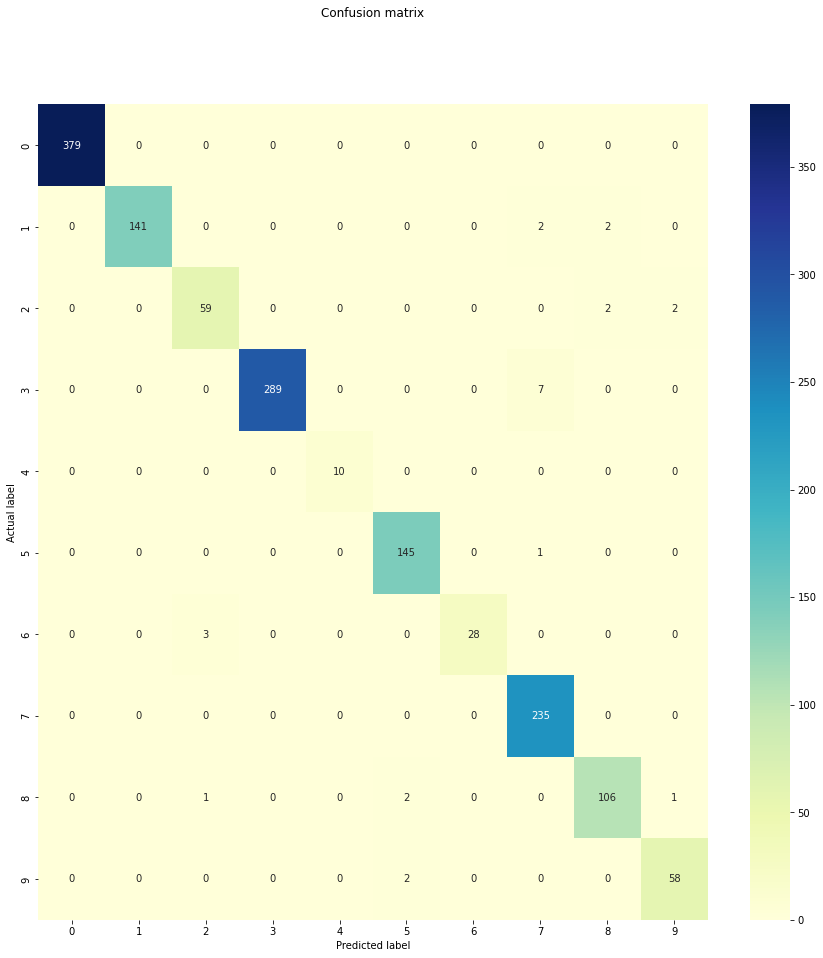

<Figure size 864x864 with 0 Axes>

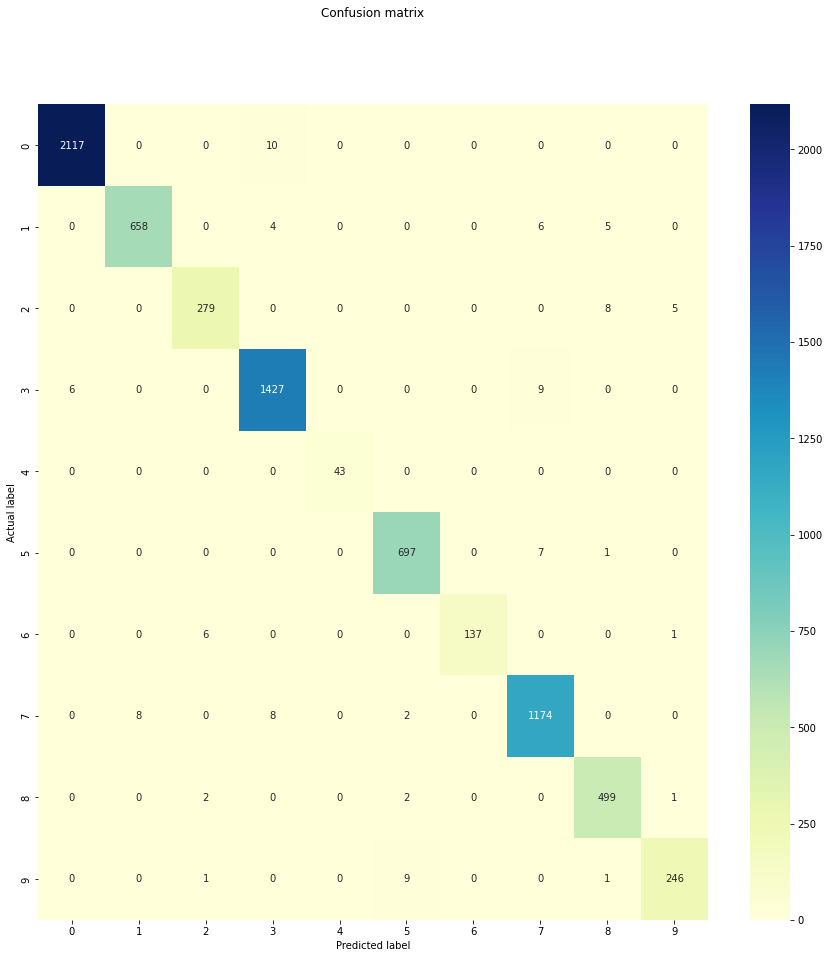

In [34]:
from sklearn.svm import SVC

df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

svc = SVC()
cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
                y_test, y_pred)
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15,15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                            annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    y_test_cat = to_categorical(y_test)
    y_pred_cat = to_categorical(y_pred)
    plt.savefig('figures_results\\SVC\\SVC_conf_matrix_'+str(fold_number)+'_fold.png')
    create_roc_curve(y_test_cat, y_pred_cat, 'SVC', fold_number)
    clsf_report = pd.DataFrame(classification_report(y_true = y_test_cat, y_pred = y_pred_cat, output_dict=True)).transpose()
    clsf_report.to_csv('svc_fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1

plt.clf()
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(sum(cfs)),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\\SVC\\SVC_overlapped_matrix_5_fold.png')

<Figure size 432x288 with 0 Axes>

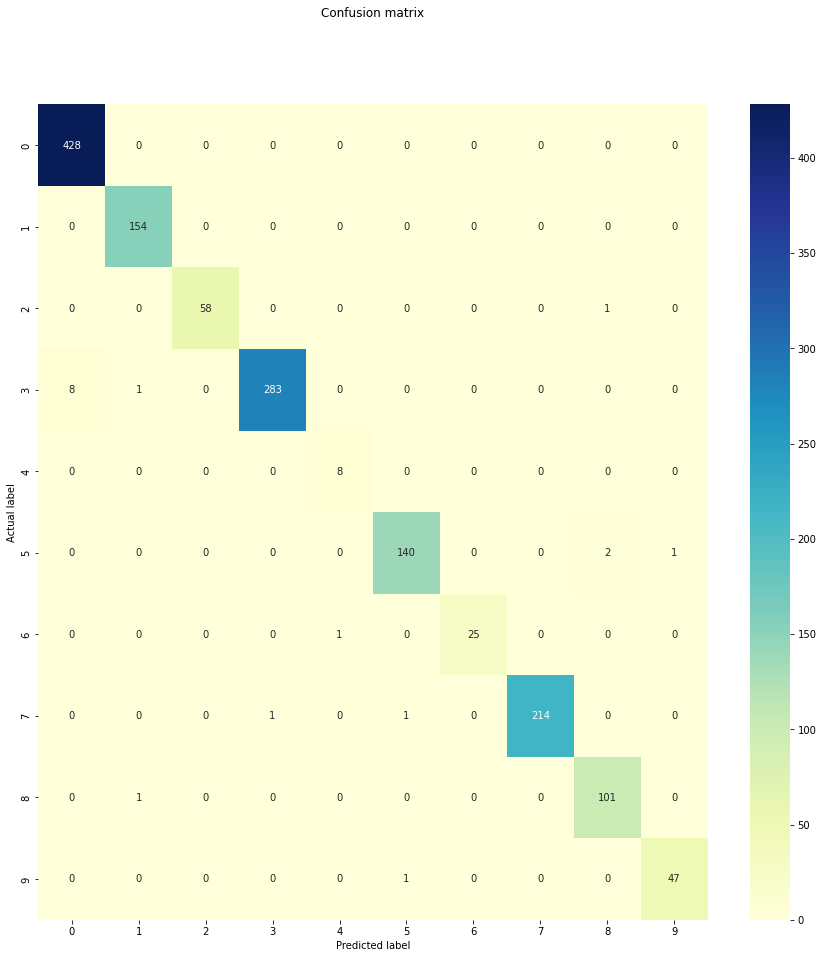

<Figure size 864x864 with 0 Axes>

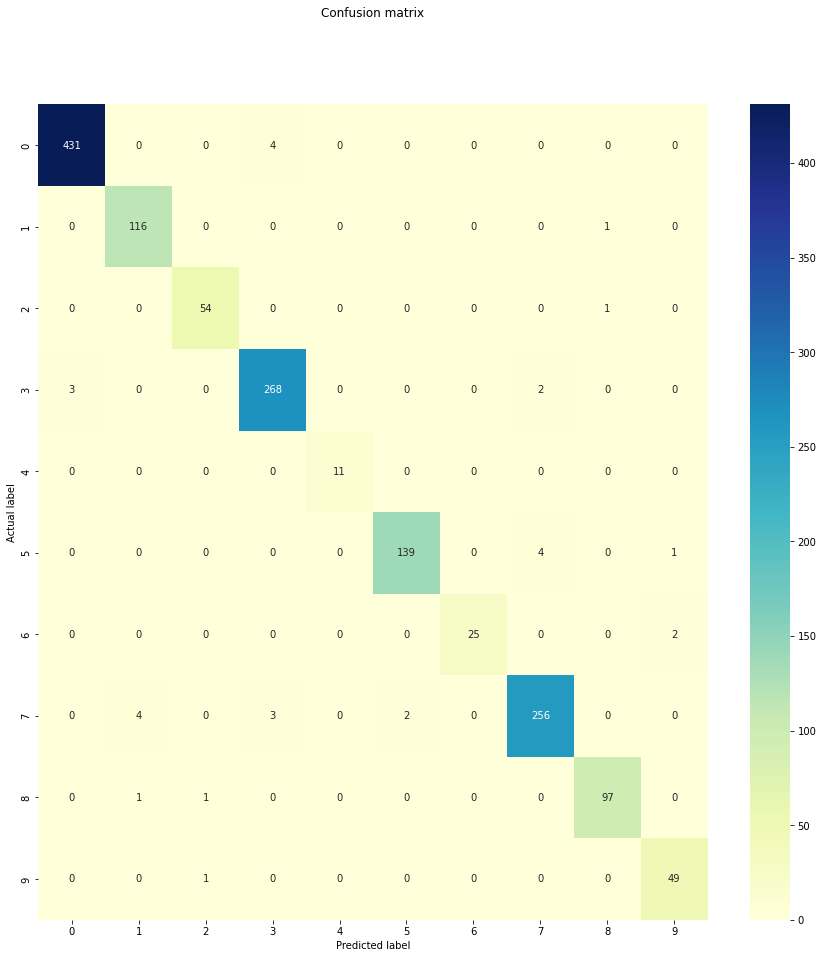

<Figure size 864x864 with 0 Axes>

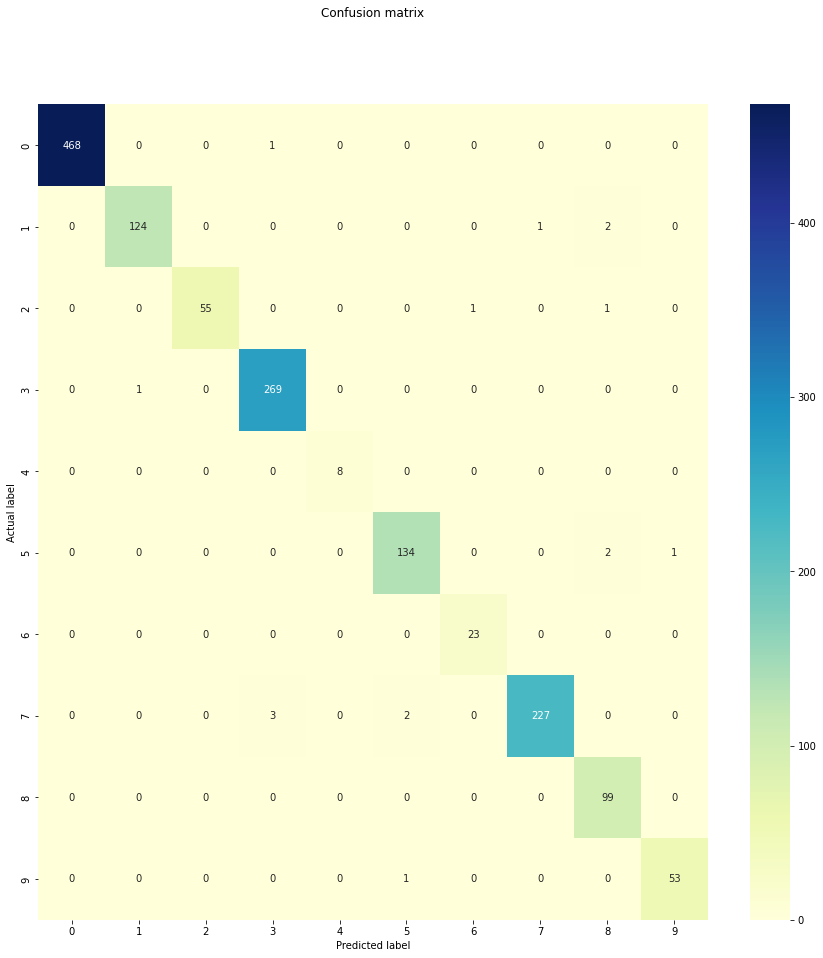

<Figure size 864x864 with 0 Axes>

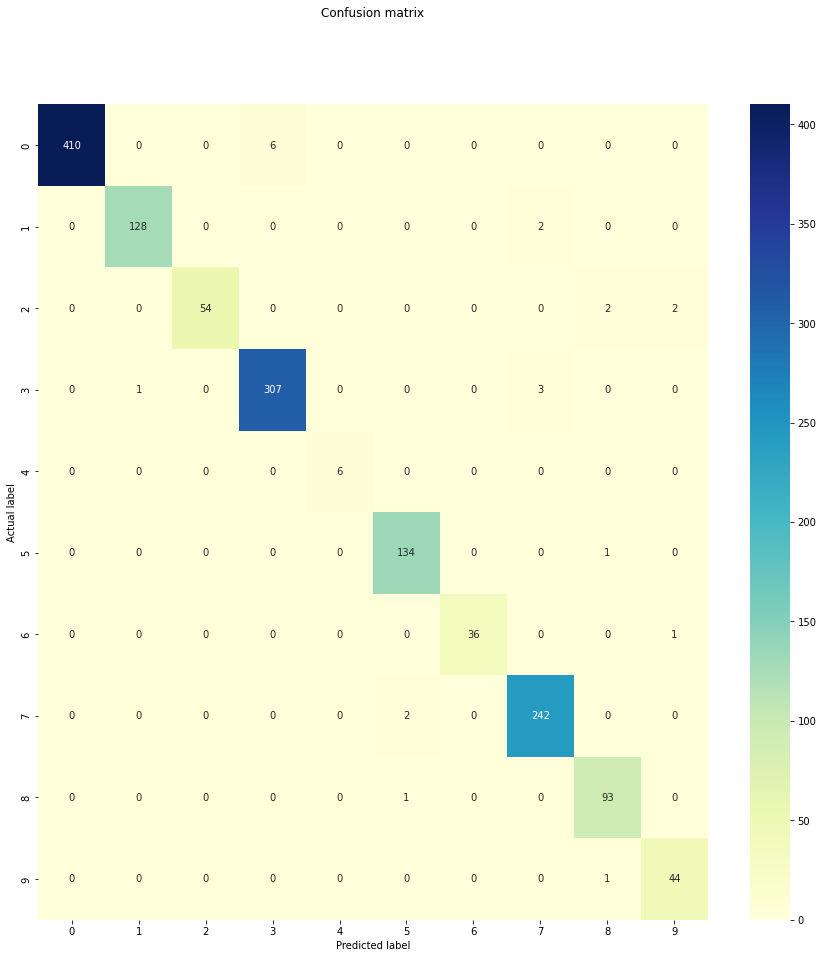

<Figure size 864x864 with 0 Axes>

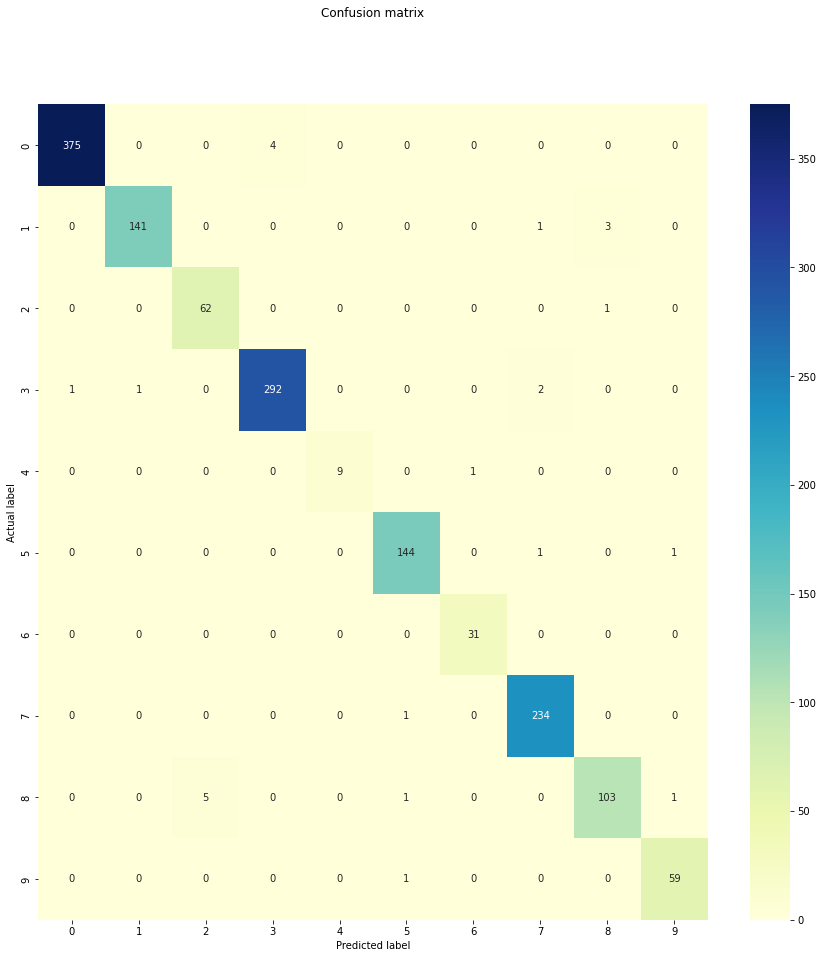

<Figure size 864x864 with 0 Axes>

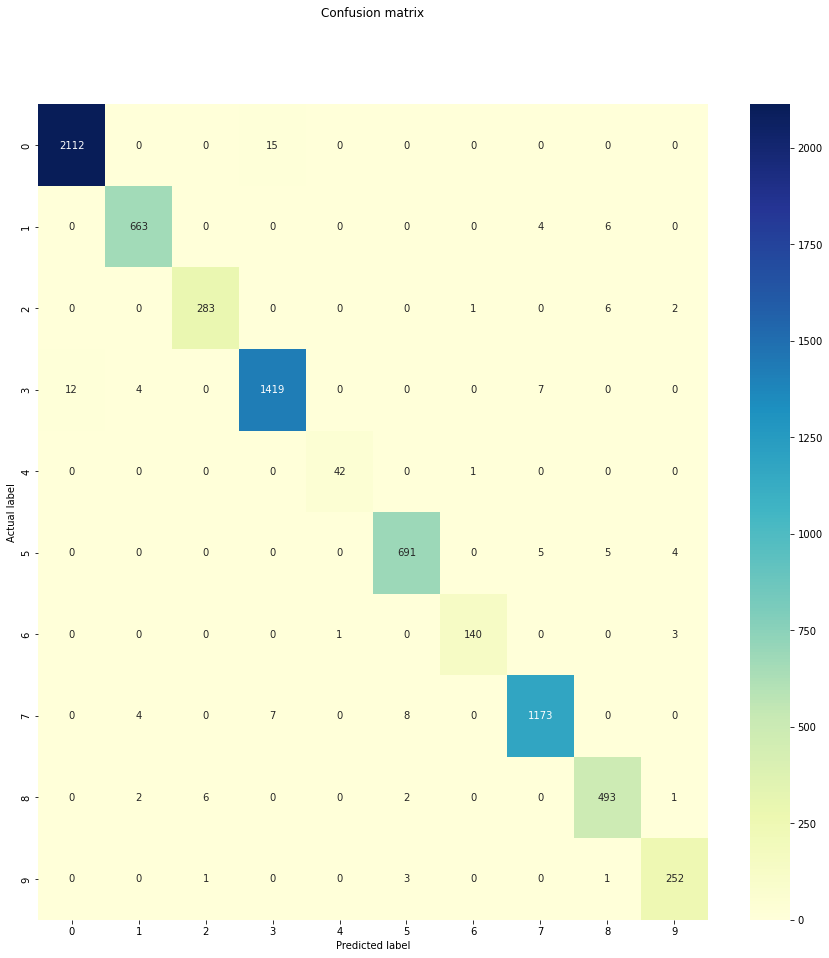

In [33]:
from sklearn.svm import SVC

df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))

rfc = RandomForestClassifier()
cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
                y_test, y_pred)
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15,15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                            annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    y_test_cat = to_categorical(y_test)
    y_pred_cat = to_categorical(y_pred)
    plt.savefig('figures_results\\RandomForestClassifier\\RandomForestClassifier_conf_matrix_'+str(fold_number)+'_fold.png')
    create_roc_curve(y_test_cat, y_pred_cat, 'RandomForestClassifier', fold_number)
    clsf_report = pd.DataFrame(classification_report(y_true = y_test_cat, y_pred = y_pred_cat, output_dict=True)).transpose()
    clsf_report.to_csv('rfc_fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1

plt.clf()
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(sum(cfs)),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\\RandomForestClassifier\\RandomForestClassifier_overlapped_matrix_5_fold.png')

<Figure size 432x288 with 0 Axes>

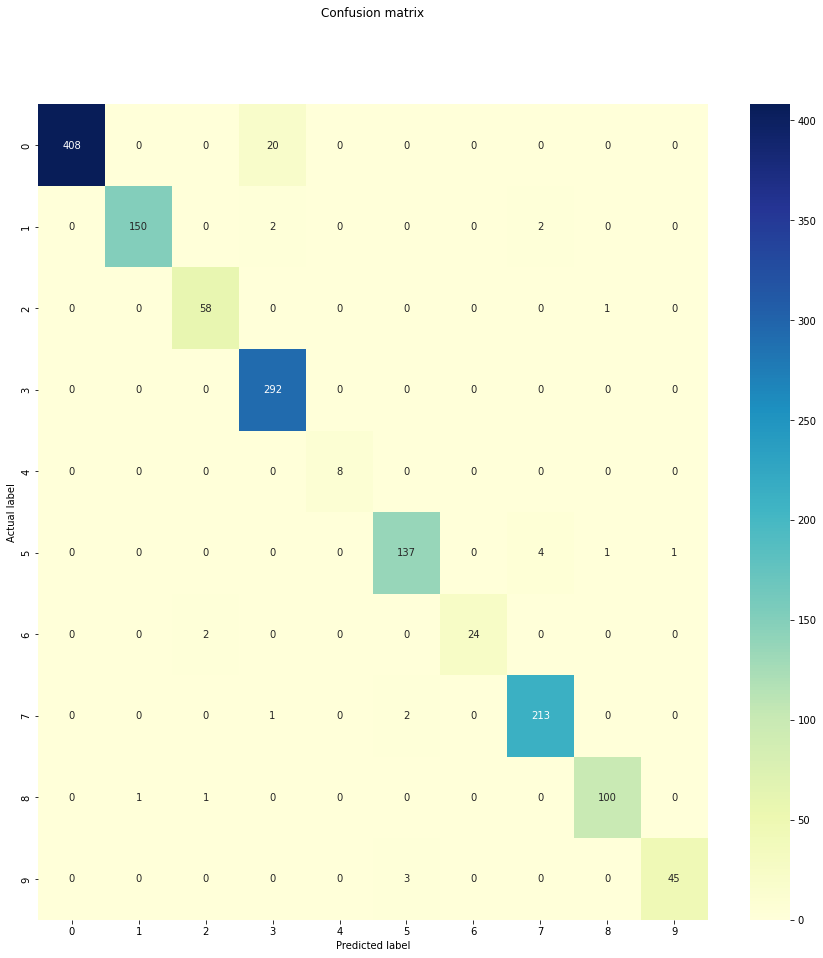

<Figure size 864x864 with 0 Axes>

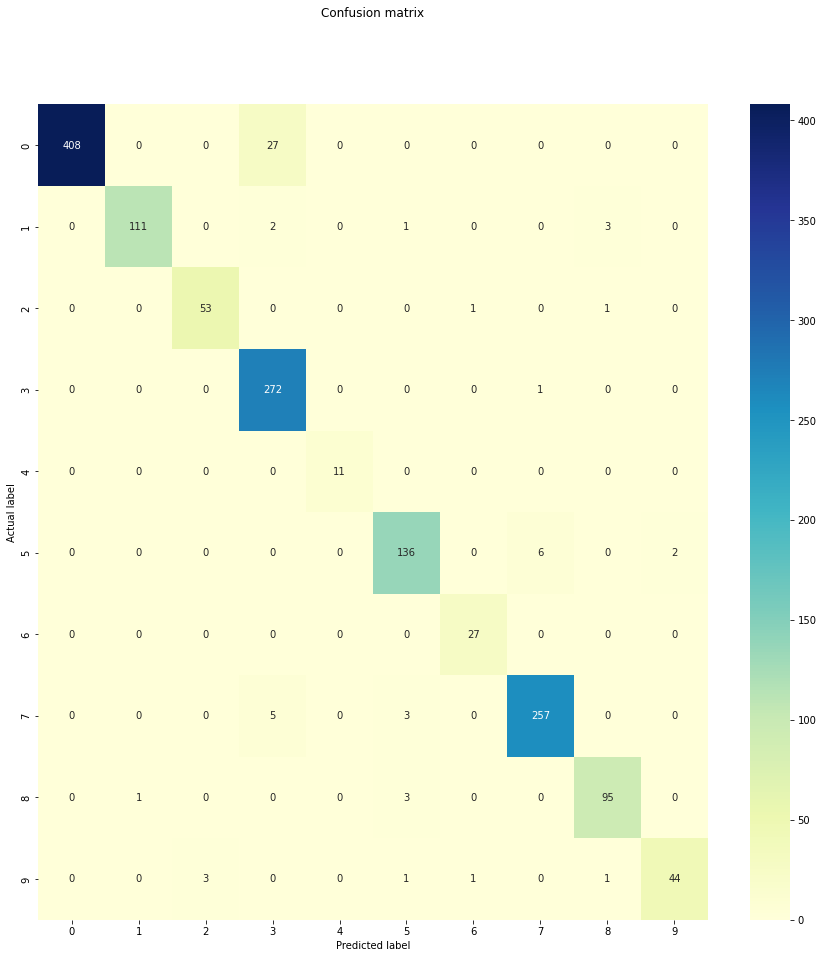

<Figure size 864x864 with 0 Axes>

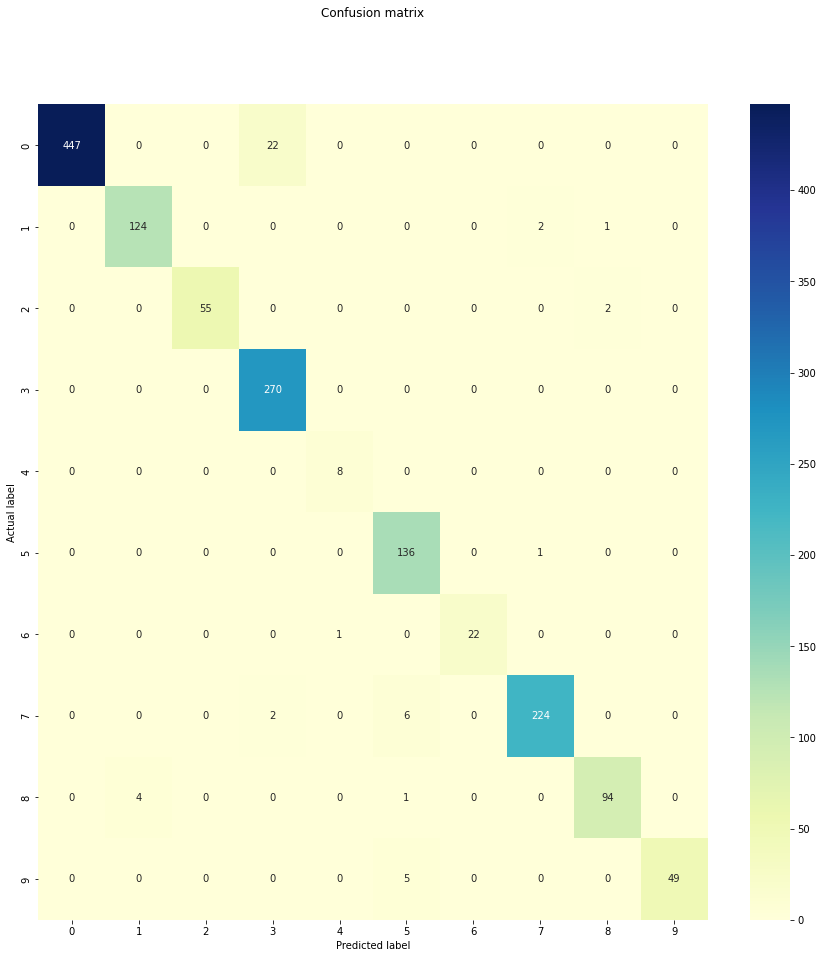

<Figure size 864x864 with 0 Axes>

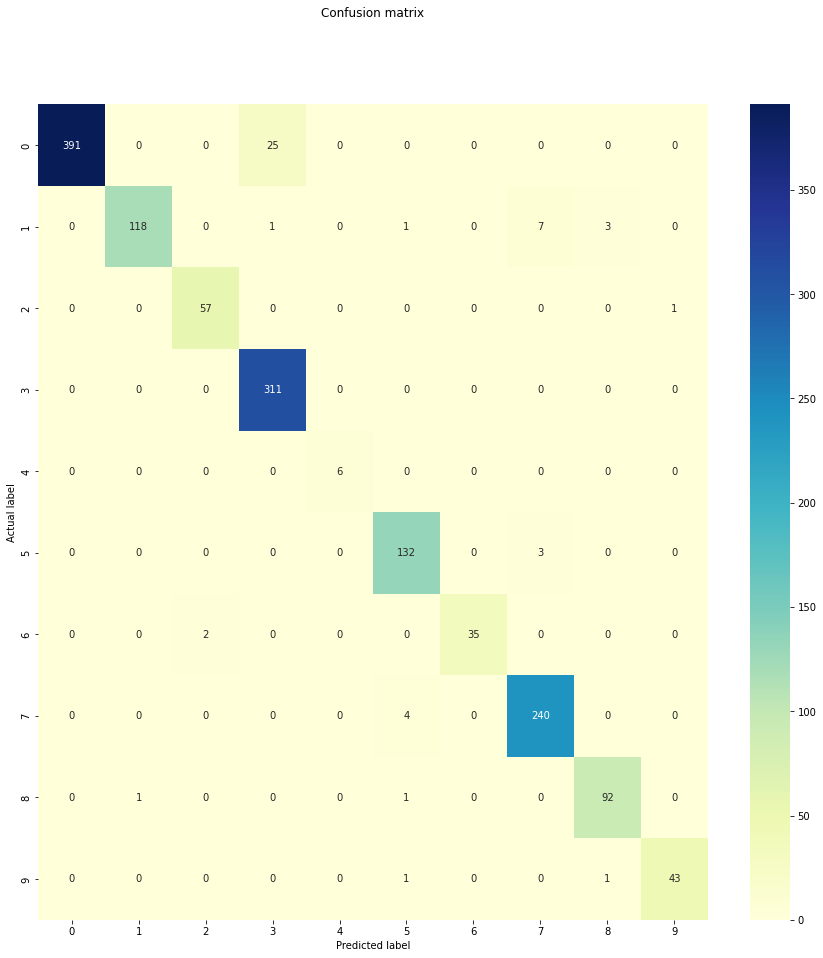

<Figure size 864x864 with 0 Axes>

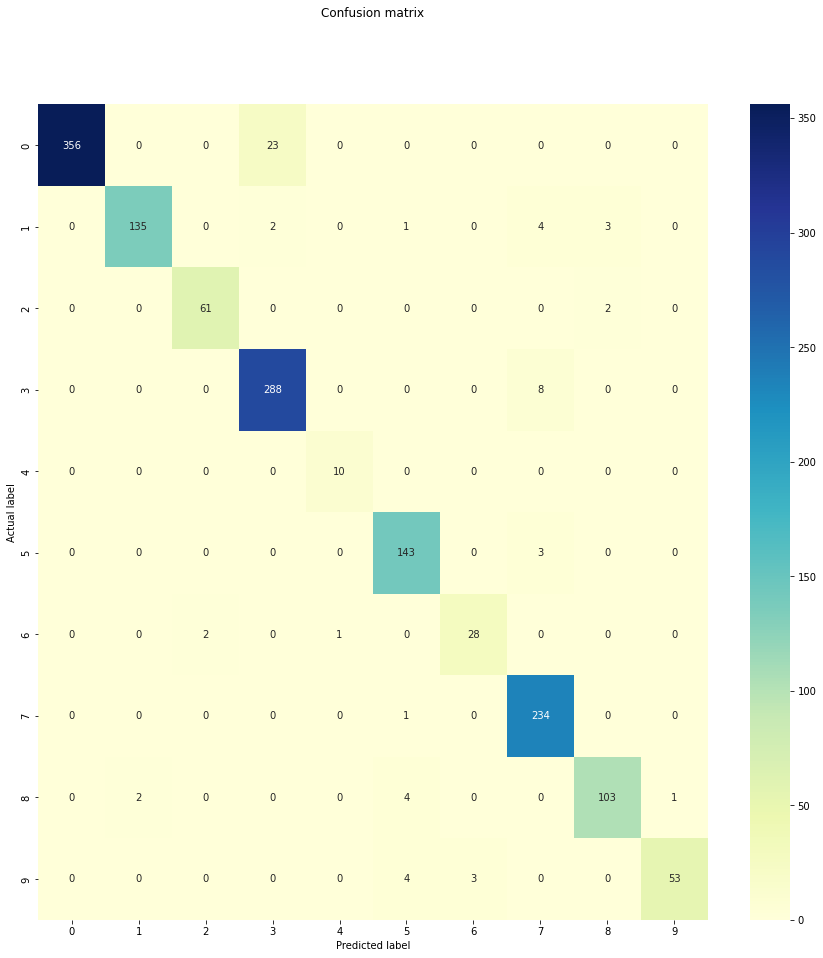

<Figure size 864x864 with 0 Axes>

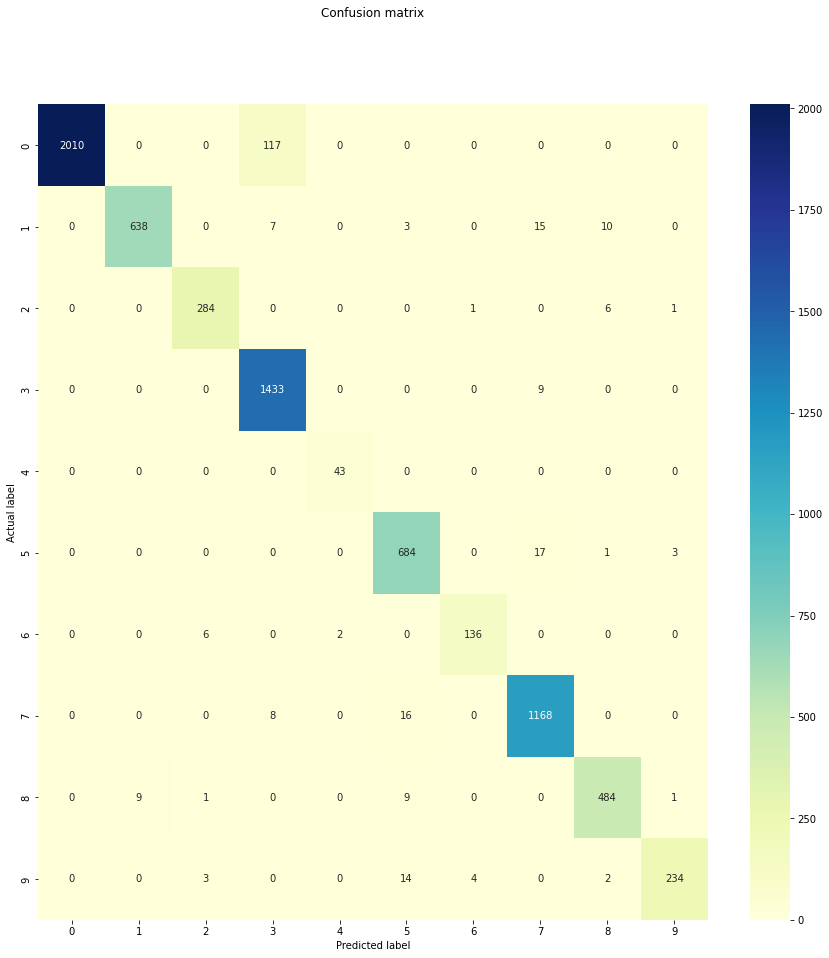

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
df = pd.read_csv('data/clustered_data.csv').drop(['id', 'player_name', 'position'], axis=1)
X = df.drop(['classes'], axis = 1).values
y = df['classes']
n_cols = len(np.unique(y))
clas_reps = []
gnb = GaussianNB()
cfs = []

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(2)
X = pca.fit_transform(X)

kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold_number = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    cnf_matrix = metrics.confusion_matrix(
                y_test, y_pred)
    cfs.append(cnf_matrix)
    plt.clf()
    plt.figure(figsize=(15,15))
    sns.heatmap(pd.DataFrame(cnf_matrix),
                            annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    y_test_cat = to_categorical(y_test)
    y_pred_cat = to_categorical(y_pred)
    clas_rep = classification_report(y_test_cat, y_pred_cat)
    plt.savefig('figures_results\\GaussianNB\\GaussianNB_conf_matrix_'+str(fold_number)+'_fold.png')
    create_roc_curve(y_test_cat, y_pred_cat, 'GaussianNB', fold_number)
    clsf_report = pd.DataFrame(classification_report(y_true = y_test_cat, y_pred = y_pred_cat, output_dict=True)).transpose()
    clsf_report.to_csv('fold'+str(fold_number)+'_clas_report.csv', index= True)
    fold_number += 1
    


plt.clf()
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(sum(cfs)),
                        annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('figures_results\\GaussianNB\\GaussianNB_overlapped_matrix_5_fold.png')